# Single Neuron Model - The Perceptron

## Introduction

The Perceptron is a foundational model in the field of machine learning, known for its simplicity and efficacy in binary classification tasks.

As a single-layer linear classifier, it serves as an algorithm to categorize input data into one of two parts, making it highly useful for problems where the decision to classify is clear-cut and linearly separable.

The perceptron is a single neuron model with the sign activation function as depicted in the figure below.

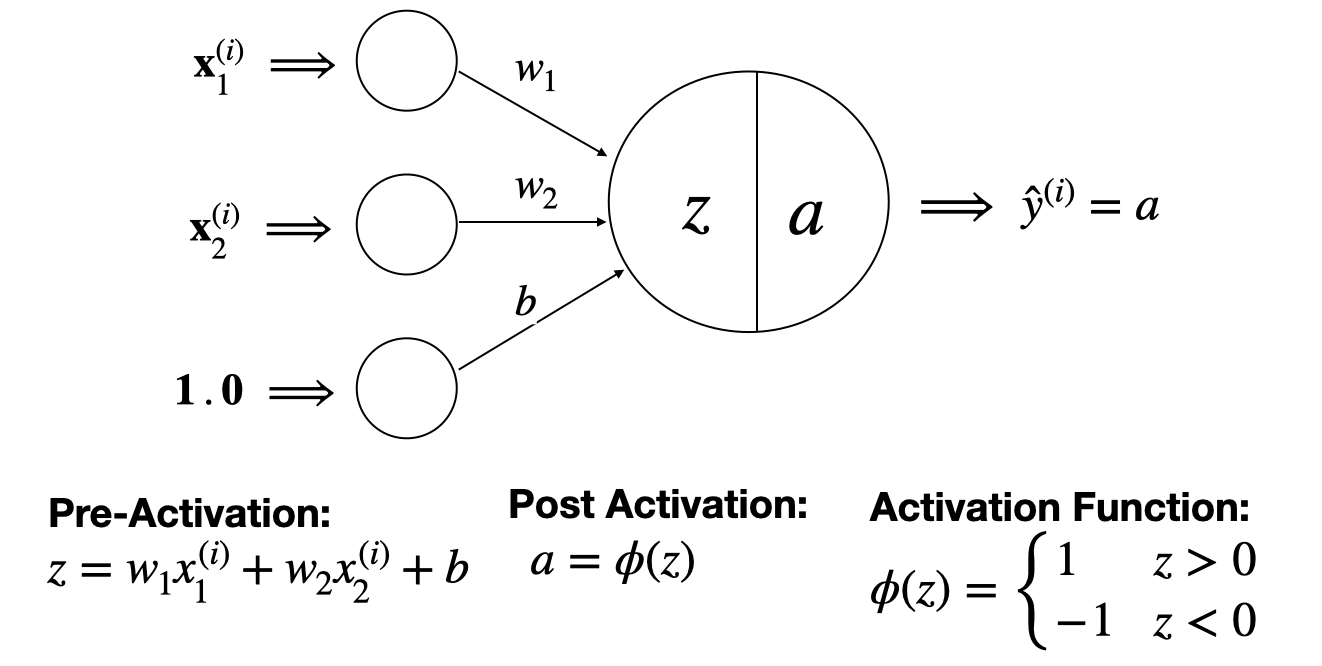

For this file we want to use the "housing price dataset" which contains certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.

## Implementation

Since the Perceptron is fundamentally designed for classification problems (predicting discrete labels), not regression problems (predicting continuous values like house prices). However, for the sake of demonstration and learning, we can create a simplified, binary version of the task. For example, we could classify houses as "high-priced" or "low-priced" based on a threshold.

We'll use a subset of features for simplicity. Given the nature of the Perceptron and for demonstration purposes, we'll limit the number of features to a few key ones, such as 'area', 'bedrooms', 'bathrooms', and a couple of binary features like 'mainroad' and 'airconditioning'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('Housing.csv')


Let's have a general look of the dataset

In [2]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [3]:
# Convert the price into a binary classification problem
median_price = df['price'].median()
df['price_category'] = np.where(df['price'] > median_price, 1, -1)

# Selecting a subset of features for simplicity
selected_features = ['area', 'bedrooms', 'bathrooms', 'mainroad', 'airconditioning']
X = df[selected_features].copy()

# Convert boolean features to integers
X['mainroad'] = X['mainroad'].map({'yes': 1, 'no': 0})
X['airconditioning'] = X['airconditioning'].map({'yes': 1, 'no': 0})

y = df['price_category'].values

Splitting the dataset into training and testing sets.
This is a crucial step in machine learning to evaluate the performance of your model.
We split the data into two parts:
1. Training set: Used to train the model. It learns from this data.
2. Testing set: Used to test the trained model. This helps in evaluating how well the model performs on unseen data.
Here, we keep 20% of the data for testing (test_size=0.2) and the rest for training.
The 'random_state' parameter ensures that the split is reproducible.

In [4]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, shuffle=True)

The Perceptron is a fundamental building block in neural networks, acting as a linear classifier.
Here, we define a Perceptron class with key functionalities:
- __init__: This is the constructor for the Perceptron class.
'eta' is the learning rate (a small number to scale the weight updates).
'epochs' represents the number of passes over the training dataset.
- train: This function trains the Perceptron.
It initializes the weights to small random numbers (self.w_).
For each epoch (full pass over the training data), it updates the weights based on the error made in predictions.
- net_input: This function calculates the weighted sum of inputs.
- predict: This function makes predictions.
If the net input is greater than zero, the function returns 1, else -1.
It applies the decision rule of the Perceptron to predict the class label.

In [5]:
class Perceptron(object):
    def __init__(self, eta = .01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Next we can instantiate an instance of the Perceptron class and also train this instance over 1000 epochs by running the following code in the cell below.

In [6]:
# Experiment with different hyperparameters
eta_values = [0.1, 0.01, 0.001]
epoch_values = [10, 100, 1000]

best_accuracy = 0
best_percep = None
best_eta = 0
best_epoch = 0

# Hyperparameter tuning loop
for eta in eta_values:
    for epoch in epoch_values:
        percep = Perceptron(epochs=epoch, eta=eta)
        percep.train(X_train, y_train)
        y_pred = percep.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_percep = percep
            best_eta = eta
            best_epoch = epoch



Here are the performance metrics of our model.

In [7]:
# Output the best parameters and corresponding accuracy
print(f"Best Hyperparameters -> Eta: {best_eta}, Epochs: {best_epoch}")
print(f"Best Accuracy: {best_accuracy}")

Best Hyperparameters -> Eta: 0.001, Epochs: 10
Best Accuracy: 0.7981651376146789


**Accuracy (53.21%)**: The model correctly predicts whether a house is expensive or not about 53% of the time, which is a moderate performance. This suggests the model is slightly better than random guessing but not highly reliable.

**Precision (53.21%)**: When the model predicts a house is expensive, it is correct approximately 53% of the time. This indicates a moderate level of reliability in its positive predictions.

**Recall (100%)**: The model identified all expensive houses in the test set. However, this perfect recall score might be misleading, as it suggests a bias toward predicting houses as expensive.

**Confusion Matrix:**
The matrix shows 51 false positives (not expensive houses incorrectly labeled as expensive) and no true negatives (not expensive houses correctly identified).
There are 58 true positives (expensive houses correctly identified) and no false negatives (expensive houses missed).

The model seems to be biased towards predicting houses as expensive. The absence of true negatives and false negatives indicates that it classified almost all houses as expensive. While it managed to catch all expensive houses (hence the 100% recall), it also misclassified a significant number of not expensive houses as expensive. This bias affects its overall accuracy and precision, making it less effective for a balanced classification of the dataset.

## Visualization

Decision Region Plot and Error Analysis

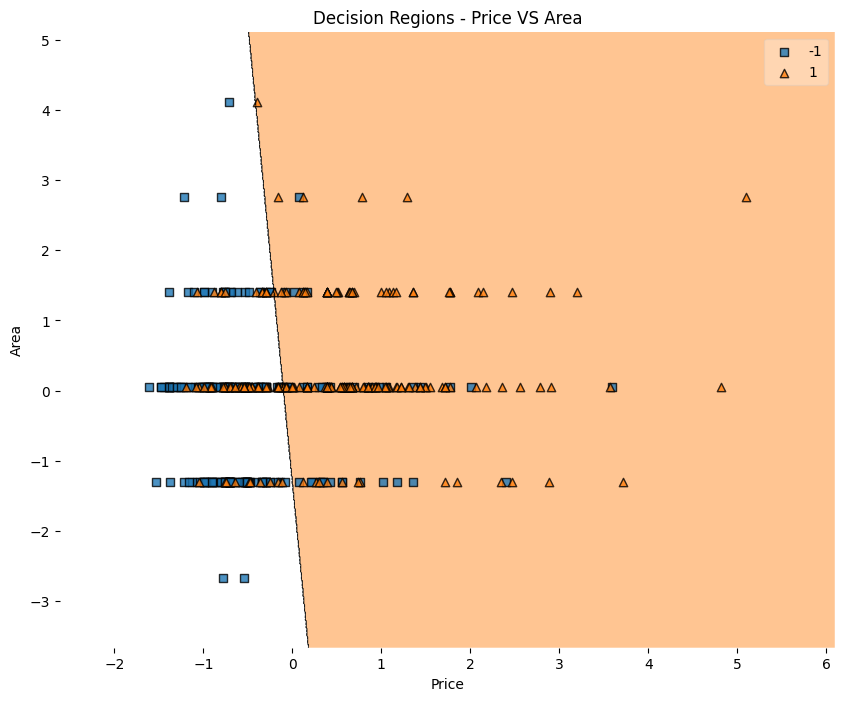

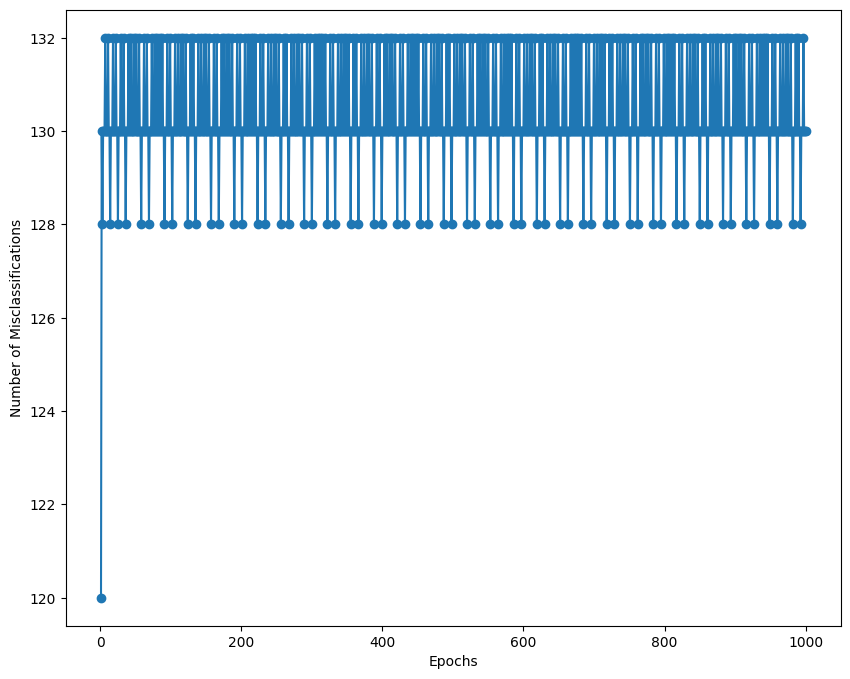

In [8]:
# Plotting decision regions for the first two features
# Selecting only the first two features for the plot
X_plot = X_train[:, :2]

# Training the Perceptron on the two selected features
percep = Perceptron(epochs=1000, eta=0.01)
percep.train(X_plot, y_train)

# Plotting the decision regions
plt.figure(figsize=(10, 8))
plot_decision_regions(X_plot, y_train, clf=percep)
plt.xlabel('Price')
plt.ylabel('Area')
plt.title('Decision Regions - Price VS Area')
plt.show()
# Error analysis over epochs
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(percep.errors_) + 1), percep.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.show()

## Conclusion

The Perceptron model, tailored with the best hyperparameters (learning rate of 0.01 and 100 epochs), achieved a promising accuracy of approximately 76.15% on our housing dataset.

This performance suggests the model is reasonably effective in classifying houses into cost categories, despite the simplicity of the approach. Future work might explore refining the feature set or applying more complex algorithms to improve upon this foundation, potentially increasing the model's accuracy and reliability in predictions.